# Анализ данных в Python

# Продвинутая визуализация

*Автор: Марина Пак*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

# Графики для анализа распределения переменных. <br>Библиотека seaborn

- гистограмма (распределение в виде столбиков)
- ядерная оценка плотности (простыми словами - сглаженная гистограмма)
- ящик с усами (медиана + интерквартильный размах + выбросы)
- скрипичный график (аналог ящика с усами + форма распределения)

На прошлом семинаре мы изучали взаимосвязи на реальных данных по рынку недвижимости. Вспомним, что это были данные за февраль 2023 г.

Подробнее на Домклик: https://opendata.domclick.ru/

In [2]:
data = pd.read_excel('Домклик данные за февраль 2023.xlsx', sheet_name = 'итог очищенный')
data.dropna(inplace = True)

# ссылка на данные https://github.com/aaparshina/22-23_Intro-to-DS/blob/main/DATA/Домклик%20данные%20за%20февраль%202023.xlsx

Распределение с ядерной оценкой плотности можно изобразить следующими способами.

Первый способ:

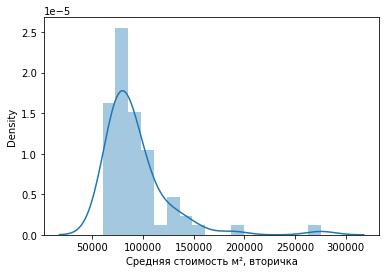

In [3]:
sns.distplot(data['Средняя стоимость м², вторичка']);

# попробуйте добавить аргумент rug = True и самостоятельности изучить, что он означает

Второй способ:

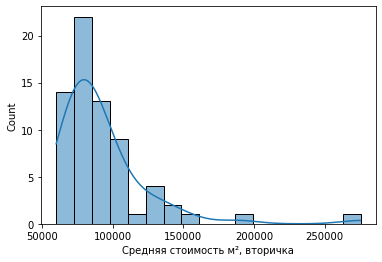

In [4]:
sns.histplot(data['Средняя стоимость м², вторичка'], kde = True);

Ранее мы пробовали изобразить ящик с усами с помощью библиотеки matplotlib. Убедимся, что и в seaborn она так же реализована.

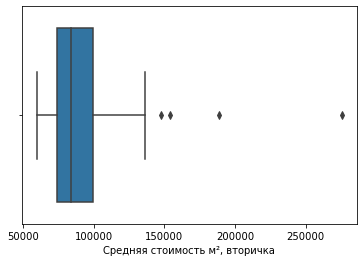

In [5]:
# Пример для одной переменной

sns.boxplot(data['Средняя стоимость м², вторичка']);

In [6]:
# для примера с несколькими переменными сначала немного трансформируем данные

melted_df = data[['Средняя стоимость м², вторичка', 'Средняя стоимость м², новостройки']].melt(
    var_name = 'Показатель', 
    value_name = 'Значение'
)
melted_df.head()

,Показатель,Значение
0,"Средняя стоимость м², вторичка",127764.0
1,"Средняя стоимость м², вторичка",153659.0
2,"Средняя стоимость м², вторичка",275281.0
3,"Средняя стоимость м², вторичка",188425.0
4,"Средняя стоимость м², вторичка",93333.0


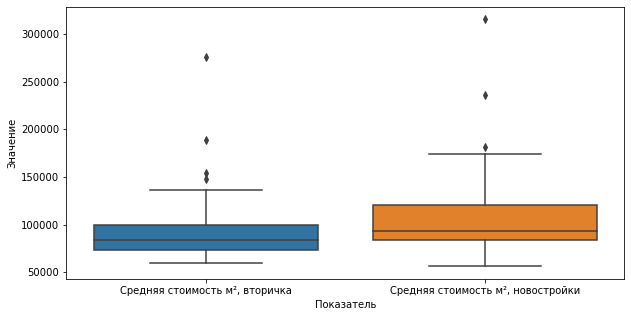

In [7]:
# Пример для нескольких переменных

fig = plt.figure(figsize = [10, 5])
sns.boxplot(x = melted_df['Показатель'], y = melted_df['Значение']);

Скрипичный график помимо интерквартильного размаха (жирная темная полоса в центре) и медианы (белая точка в центре), позволяет увидеть и форму распределения (например, на ящике с усами не удастся увидеть, что распределение бимодальное (2 моды - 2 горба у распределения). Синтаксис аналогичен предыдущим графикам с ящиками с усами.

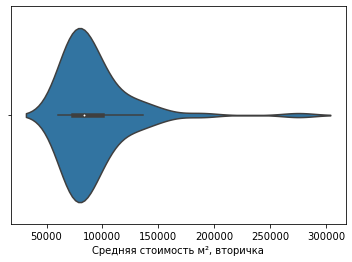

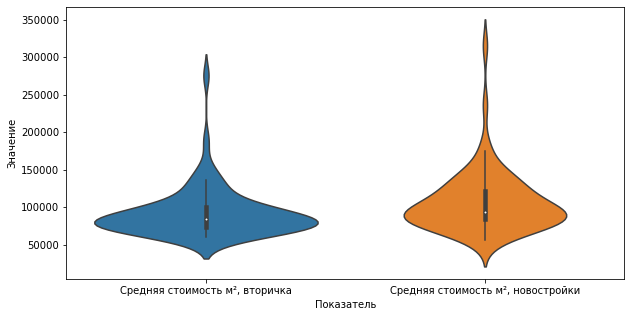

In [8]:
# пример для одной переменной
sns.violinplot(data['Средняя стоимость м², вторичка']);

# Пример для нескольких переменных

fig = plt.figure(figsize = [10, 5])
sns.violinplot(x = melted_df['Показатель'], y = melted_df['Значение']);

# Разведочный анализ данных (EDA - Exploratory data analysis)

При анализе данных помимо анализа каждого ряда данных в отдельности (в динамике, распределения, статистические характеристики), полезно анализировать несколько рядов одновременно.

На предыдущих семинарах мы изучали, что линейную взаимосвязь можно заметить с помощью коэффициента корреляции. Ниже попробуем нарисовать матрицу корреляции, закрашенную цветом.

<AxesSubplot:>

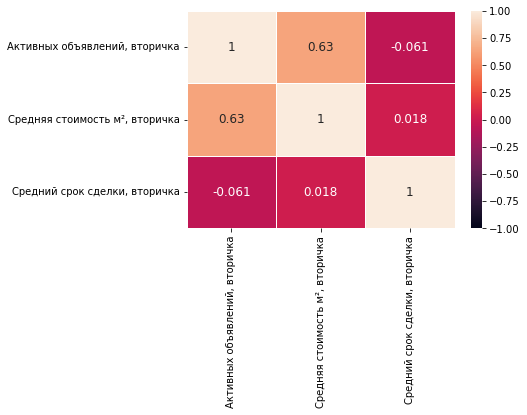

In [9]:
# создаем мактрицу корреляции

corr_data = data[[
    'Активных объявлений, вторичка', 
    'Средняя стоимость м², вторичка', 
    'Средний срок сделки, вторичка']].corr()

# рисуем ее (тепловая карта)
sns.heatmap(
    corr_data, # на вход подается матрица корреляции, а не исходные данные!
    linewidths = 0.5, # толщина линии между квадратами
    annot = True, # добавить надписи со значениями коэффициента корреляции
#     cmap = 'viridis', # изменение цветовой шкалы
    vmax = 1, # максимальное значение шкалы
    vmin = -1, # минимальное значение шкалы
    linecolor = "white", # цвет линии, разделяющей график на квадраты 
    annot_kws = {'size': 12} # размер шрифта (для annot параметра)
)

Распрелеление каждой переменной и их двумерные графики (каждый с каждым) можно отобразить с помощью функции sns.pairplot

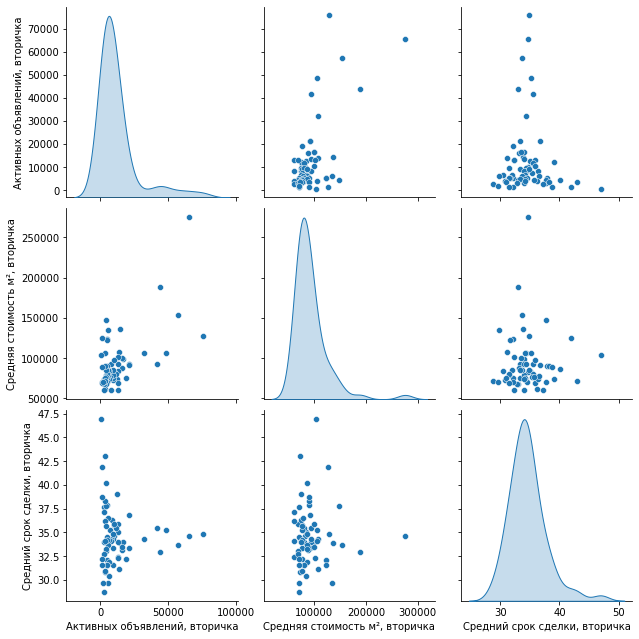

In [33]:
sns.pairplot(
    data[[
        'Активных объявлений, вторичка', 
        'Средняя стоимость м², вторичка', 
        'Средний срок сделки, вторичка'
    ]], 
    diag_kind = 'kde', # сюда можно вписать hist и вместо ядерных оценок плотности будут нарисованы гистограммы.
    height = 3
);

Если бы вы хотели отобразить тот же график, но в зависимости от какого-либо признака (например, если добавить столбец, где будет указана единица, если в этом регионе действуют льготные условия кредитования для определенной категории граждан, и 0 - если не действуют), то синтаксис был бы следующим:

```
sns.pairplot(
    data[<столбец 1, столбец 2, ...>], 
    hue = '<признак>'
    )
```

Обратите внимание, что при большом количестве переменных данных график будет уже плохо читаемым.

**Упражнение**: представьте, что у вас 10 переменных, для которых вы хотите нарисовать гистограммы с ядерной оценкой плотности, а также диаграмму рассеяния каждый с каждым. Попробуйте реализовать это, вспомнив циклы.

**Упражнение**: выше мы рассматривали только количественные переменные. А как бы вы изобразили распределение для нескольких категориальных переменных? Подумайте, что могло бы служить такой переменной в датасете с недвижимостью? Попробуйте дополнить датасет такой переменной и поэкспериментировать с графиком `sns.catplot`

# Интерактивная визуализация с помощью библиотеки plotly

In [34]:
from plotly import graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import plotly.express as px
from plotly.subplots import make_subplots

In [35]:
# выделим некоторые регионы 
df = data[data['Регион'].isin([
    'Москва', 
    'Санкт-Петербург', 
    'Нижегородская Область', 
    'Новосибирская Область', 
    'Приморский Край'
])][[
    'Регион', 
    'Средняя стоимость м², вторичка', 
    'Средняя стоимость м², новостройки'
]]

# делим стоимость на 1000, чтобы было в тыс. руб.
df[['Средняя стоимость м², вторичка', 
    'Средняя стоимость м², новостройки']] = round(
    df[['Средняя стоимость м², вторичка', 'Средняя стоимость м², новостройки']] / 1e3, 0).astype(int)

In [36]:
df

,Регион,"Средняя стоимость м², вторичка","Средняя стоимость м², новостройки"
2,Москва,275,315
3,Санкт-Петербург,188,236
6,Новосибирская Область,106,138
20,Нижегородская Область,101,127
24,Приморский Край,123,154


In [37]:
df # для графика с помощью go

,Регион,"Средняя стоимость м², вторичка","Средняя стоимость м², новостройки"
2,Москва,275,315
3,Санкт-Петербург,188,236
6,Новосибирская Область,106,138
20,Нижегородская Область,101,127
24,Приморский Край,123,154


In [38]:
# для графика px

df_to_px = df.melt(
    id_vars = 'Регион',
    var_name = 'Тип жилья',
    value_name = 'Стоимость, тыс. руб.'
)

df_to_px['Тип жилья'] = df_to_px['Тип жилья'].str.replace('Средняя стоимость м², ', '')
df_to_px

,Регион,Тип жилья,"Стоимость, тыс. руб."
0,Москва,вторичка,275
1,Санкт-Петербург,вторичка,188
2,Новосибирская Область,вторичка,106
3,Нижегородская Область,вторичка,101
4,Приморский Край,вторичка,123
5,Москва,новостройки,315
6,Санкт-Петербург,новостройки,236
7,Новосибирская Область,новостройки,138
8,Нижегородская Область,новостройки,127
9,Приморский Край,новостройки,154


In [39]:
px.bar(
    df_to_px,
    x = 'Регион',
    y = 'Стоимость, тыс. руб.',
    color = 'Тип жилья',
    barmode = 'group',
    title = 'Средняя стоимость кв. м. жилья'
)

Ниже давайте попробуем настроить наш график и сделать его более красивым. В сравнении с px, go дает больше возможностей для настройки графика и конкретных его параметров

In [40]:
px.colors.sequential.tempo # посмотрите в интернете, какая это палитра, можете далее заменить на свою

['rgb(254, 245, 244)',
 'rgb(222, 224, 210)',
 'rgb(189, 206, 181)',
 'rgb(153, 189, 156)',
 'rgb(110, 173, 138)',
 'rgb(65, 157, 129)',
 'rgb(25, 137, 125)',
 'rgb(18, 116, 117)',
 'rgb(25, 94, 106)',
 'rgb(28, 72, 93)',
 'rgb(25, 51, 80)',
 'rgb(20, 29, 67)']

In [41]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = df['Регион'],
        y = df['Средняя стоимость м², вторичка'],
        name = 'вторичка',
        marker_color = px.colors.sequential.tempo[8],
        text = df['Средняя стоимость м², вторичка'].apply(lambda x : "{:,}".format(x)),
        textposition = 'inside',
        insidetextanchor = 'middle',
        textangle = 0
    )
)

fig.add_trace(
    go.Bar(
        x = df['Регион'],
        y = df['Средняя стоимость м², новостройки'],
        name = 'новостройки',
        marker_color = px.colors.sequential.tempo[3],
        text = df['Средняя стоимость м², новостройки'].apply(lambda x : "{:,}".format(x)),
        textposition = 'inside',
        insidetextanchor = 'middle',
        textangle = 0
    )
)

fig.update_layout(
    width = 1000,
    height = 500,
    barmode = 'group',
    xaxis_tickangle = 0,
    title = 'Средняя стоимость жилья по регионам', # попробуйте подвинуть названия вправо/влево
    font_color = 'black',
    xaxis = {
        'title': 'регион',
        'tickangle': 45
    },
    yaxis = {
        'title': 'тысяч рублей',
        'tickformat': '000'
    },
    legend = {
        'orientation': 'h',
        'title': 'тип жилья',
        'yanchor': 'top',
        'xanchor': 'right',
        'y': 1.1,
        'x': 1
    }
)

**Упражнение**: попробуйте скачать данные за несколько месяцев из дом клик и сделать интерактивный столбчатый график (пример был по диаграмме рассеяния в онлайн курсе). Пример для столбчатой диаграммы с анимацией:https://plotly.com/python/animations/
(раздел Animated Bar Charts with Plotly Express)

Попробуем нарисовать интерактивный график по биржевым данным

In [44]:
prices = pd.read_excel('Биржевые данные.xlsx')

# ссылка на данные https://github.com/aaparshina/22-23_Intro-to-DS/blob/main/DATA/Биржевые%20данные.xlsx

In [45]:
# считаем среднюю цену за месяц

prices_month = prices.resample(rule = 'MS', on = 'Дата').mean()[[
    'Доллар, цена закрытия',
    'Газпром, цена закрытия'
]]
prices_month.head()

,"Доллар, цена закрытия","Газпром, цена закрытия"
Дата,,
2021-01-01,74.400263,220.992632
2021-02-01,74.395750,223.529000
2021-03-01,74.531818,227.146364
2021-04-01,76.060341,229.357273
2021-05-01,73.893125,252.397500


In [46]:
px.line(prices_month) # самый простой способ быстро нарисовать линейные графики через plotly express

**Упражнение**: на прошедшем семинаре мы строили круговую диаграмму с помощью matplotlib. Ниже представлен тот кусочек кода. Ваша задача: построить аналогичный график, только с помощью библиотеки plotly и добавить в центре пустое пространство, чтобы дописать в нем, например, дату, за которую были совершены эти расходы. См. приме Donut Chart здесь https://plotly.com/python/pie-charts/ 

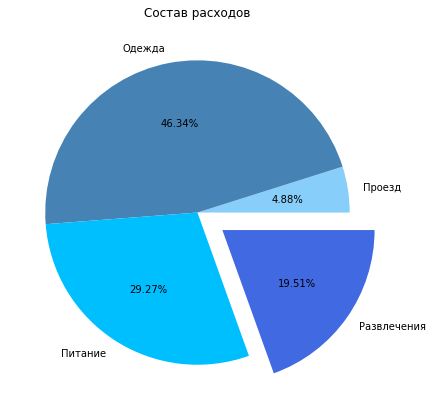

In [47]:
consumption = pd.DataFrame(
    {
        'Тип расхода': ['Проезд', 'Одежда', 'Питание', 'Развлечения'],
        'Сумма расхода, руб.': [100, 950, 600, 400]
    }
)
consumption

plt.figure(figsize = [7, 7])

plt.pie(
    x = consumption['Сумма расхода, руб.'],
    labels = consumption['Тип расхода'],
    # explode - под каждый тип расхода насколько "вытащить" сектор из круга. полезно, если нужно акцентировать на нем внимание
    explode = [0, 0, 0, 0.2], 
    colors = ['lightskyblue', 'steelblue', 'deepskyblue', 'royalblue'],
    autopct = '%1.2f%%', # этим параметром задаем формат строки вывода процентов (они считаются автоматически)
    pctdistance = 0.6, # насколько отдалены надписи с процентами от центра
    labeldistance = 1.1, # насколько отдалены надписи с типом расходов от центра
#     radius = 0.7, # изменить радиус круга
)

plt.title('Состав расходов')
plt.show()

**Упражнение**: после того, как вы построите 1 такой график, попробуйте на основе информации из раздела Pie Charts in subplots (https://plotly.com/python/pie-charts/ ) сделать срезы за 2 дня или месяца.